In [1]:
import csv
import shutil
import os
import cv2
import numpy as np


In [2]:
ROOT = "/kaggle/input/smoke-fire-detection-yolo/data"
BAD_IMAGES_DIR = "/kaggle/working/bad_images"
BAD_LABELS_DIR = "/kaggle/working/bad_labels"
CLEAN_ROOT = "/kaggle/working/clean_data"
REPORT_CSV = "/kaggle/working/data_clean_report.csv"

In [3]:
bad_list = [
    "/kaggle/input/smoke-fire-detection-yolo/data/train/images/PublicDataset01005.jpg",
    "/kaggle/input/smoke-fire-detection-yolo/data/train/images/PublicDataset00864.jpg",
    "/kaggle/input/smoke-fire-detection-yolo/data/train/images/WEB04185.jpg",
    "/kaggle/input/smoke-fire-detection-yolo/data/train/images/WEB02767.jpg",
    "/kaggle/input/smoke-fire-detection-yolo/data/train/images/PublicDataset01036.jpg",
    "/kaggle/input/smoke-fire-detection-yolo/data/train/images/PublicDataset00934.jpg",
    "/kaggle/input/smoke-fire-detection-yolo/data/train/images/WEB06024.jpg",
    "/kaggle/input/smoke-fire-detection-yolo/data/train/images/WEB02729.jpg",
    "/kaggle/input/smoke-fire-detection-yolo/data/train/images/WEB06022.jpg",
    "/kaggle/input/smoke-fire-detection-yolo/data/train/images/WEB06334.jpg",
    "/kaggle/input/smoke-fire-detection-yolo/data/train/images/WEB04554.jpg",
    "/kaggle/input/smoke-fire-detection-yolo/data/train/images/WEB06336.jpg",
    "/kaggle/input/smoke-fire-detection-yolo/data/train/images/WEB03587.jpg",
    "/kaggle/input/smoke-fire-detection-yolo/data/train/images/WEB06082.jpg",
    "/kaggle/input/smoke-fire-detection-yolo/data/train/images/PublicDataset00900.jpg",
    "/kaggle/input/smoke-fire-detection-yolo/data/val/images/WEB02650.jpg",
    "/kaggle/input/smoke-fire-detection-yolo/data/val/images/WEB02614.jpg",
    "/kaggle/input/smoke-fire-detection-yolo/data/val/images/PublicDataset01007.jpg",
    "/kaggle/input/smoke-fire-detection-yolo/data/test/images/WEB10194.jpg",
    "/kaggle/input/smoke-fire-detection-yolo/data/test/images/WEB10116.jpg",
    "/kaggle/input/smoke-fire-detection-yolo/data/test/images/WEB10972.jpg",
    "/kaggle/input/smoke-fire-detection-yolo/data/test/images/WEB10874.jpg",
]

In [4]:

os.makedirs(BAD_IMAGES_DIR, exist_ok=True)
os.makedirs(BAD_LABELS_DIR, exist_ok=True)
for split in ["train", "val", "test"]:
    os.makedirs(os.path.join(CLEAN_ROOT, split, "images"), exist_ok=True)
    os.makedirs(os.path.join(CLEAN_ROOT, split, "labels"), exist_ok=True)

def is_valid_image(image_path):
    try:
        img = cv2.imread(image_path)
        if img is None:
            return False
        if img.size == 0:
            return False
        return True
    except Exception as e:
        print(f" Error in Image Read {image_path}: {e}")
        return False

report_rows = []

for split in ["train", "val", "test"]:
    src_img_dir = os.path.join(ROOT, split, "images")
    src_lbl_dir = os.path.join(ROOT, split, "labels")
    dst_img_dir = os.path.join(CLEAN_ROOT, split, "images")
    dst_lbl_dir = os.path.join(CLEAN_ROOT, split, "labels")
    
    if not os.path.isdir(src_img_dir):
        print("Missing dir:", src_img_dir)
        continue
    
    for fname in sorted(os.listdir(src_img_dir)):
        src_img = os.path.join(src_img_dir, fname)
        
        if not os.path.isfile(src_img):
            continue
        
        if src_img in bad_list:
            shutil.copy2(src_img, BAD_IMAGES_DIR)
            name, _ = os.path.splitext(fname)
            src_label = os.path.join(src_lbl_dir, name + ".txt")
            if os.path.exists(src_label):
                shutil.copy2(src_label, BAD_LABELS_DIR)
                report_rows.append([split, fname, "bad_image_and_label_copied"])
            else:
                report_rows.append([split, fname, "bad_image_copied_label_missing"])
            continue
        
        if not is_valid_image(src_img):
            print(f"Invalid images : {src_img}")
            shutil.copy2(src_img, BAD_IMAGES_DIR)
            name, _ = os.path.splitext(fname)
            src_label = os.path.join(src_lbl_dir, name + ".txt")
            if os.path.exists(src_label):
                shutil.copy2(src_label, BAD_LABELS_DIR)
                report_rows.append([split, fname, "corrupted_image_and_label_copied"])
            else:
                report_rows.append([split, fname, "corrupted_image_copied_label_missing"])
            continue
        
        shutil.copy2(src_img, dst_img_dir)
        name, _ = os.path.splitext(fname)
        src_label = os.path.join(src_lbl_dir, name + ".txt")
        if os.path.exists(src_label):
            shutil.copy2(src_label, dst_lbl_dir)
            report_rows.append([split, fname, "copied_with_label"])
        else:
            report_rows.append([split, fname, "copied_label_missing"])

print("=" * 50)
for split in ["train", "val", "test"]:
    clean_dir = os.path.join(CLEAN_ROOT, split, "images")
    if os.path.exists(clean_dir):
        count = len(os.listdir(clean_dir))
        print(f"{split}: {count} Valid Images ")



train: 14107 Valid Images 
val: 3096 Valid Images 
test: 4302 Valid Images 


In [5]:
print("=" * 50)
print(f"   Invlaid Images Save Her {BAD_IMAGES_DIR}")
print(f" Invlaid Labels Save Her: {BAD_LABELS_DIR}")

with open(REPORT_CSV, "w", newline="", encoding="utf-8") as f:
    w = csv.writer(f)
    w.writerow(["split", "filename", "action"])
    w.writerows(report_rows)




   Invlaid Images Save Her /kaggle/working/bad_images
 Invlaid Labels Save Her: /kaggle/working/bad_labels


In [6]:
yaml_text = f"""train: {CLEAN_ROOT}/train/images
val: {CLEAN_ROOT}/val/images
test: {CLEAN_ROOT}/test/images

nc: 2
names: ['smoke','fire']
"""
with open("/kaggle/working/data.yaml", "w", encoding="utf-8") as yf:
    yf.write(yaml_text)

print("dat.yaml is Done Created")

dat.yaml is Done Created


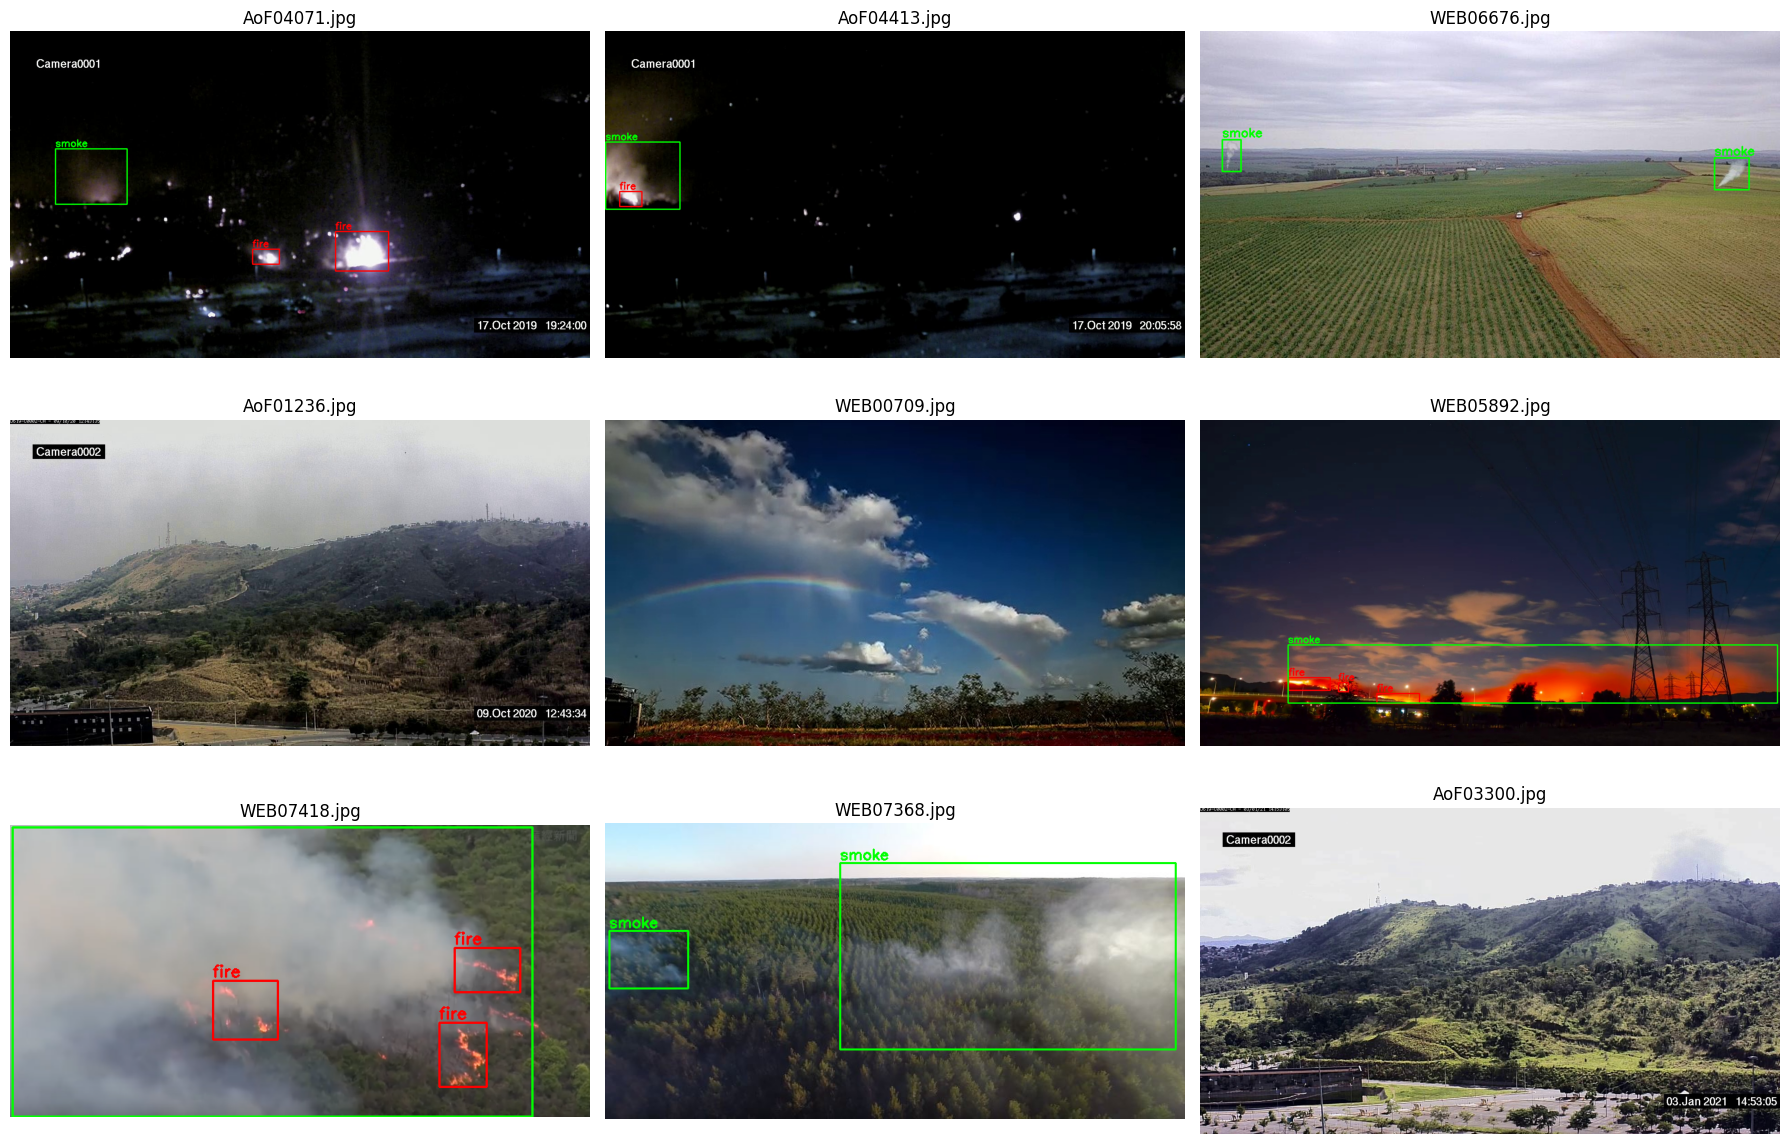

In [7]:
import os
import random
import matplotlib.pyplot as plt
import cv2
from pathlib import Path

train_img_path = "/kaggle/input/smoke-fire-detection-yolo/data/train/images"
train_label_path = "/kaggle/input/smoke-fire-detection-yolo/data/train/labels"

sample_imgs = random.sample(os.listdir(train_img_path), 9)

def plot_image_with_boxes(img_path, label_path):
    img = cv2.imread(img_path)
    h, w, _ = img.shape
    label_file = label_path.replace('.jpg', '.txt').replace('.png', '.txt')
    if os.path.exists(label_file):
        with open(label_file, "r") as f:
            for line in f.readlines():
                cls, x_center, y_center, bw, bh = map(float, line.strip().split())
                x1 = int((x_center - bw/2) * w)
                y1 = int((y_center - bh/2) * h)
                x2 = int((x_center + bw/2) * w)
                y2 = int((y_center + bh/2) * h)
                color = (0, 255, 0) if cls == 0 else (0, 0, 255)
                cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)
                cls_name = "smoke" if cls == 0 else "fire"
                cv2.putText(img, cls_name, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.7, color, 2)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

plt.figure(figsize=(18, 12))
for i, img_name in enumerate(sample_imgs):
    img_path = os.path.join(train_img_path, img_name)
    label_path = os.path.join(train_label_path, img_name)
    plt.subplot(3, 3, i+1)
    plt.imshow(plot_image_with_boxes(img_path, label_path))
    plt.axis('off')
    plt.title(img_name)
plt.tight_layout()
plt.show()


In [8]:
!pip install ultralytics


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.4 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of mkl-fft to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of mkl-random to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of mkl-umath to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.5 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 57.2 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 72.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 75.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [9]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [12]:
model = YOLO("yolo12n.pt")


In [13]:
results = model.train(data="/kaggle/working/data.yaml",epochs=60,imgsz=640,verbose=True)

Ultralytics 8.3.223 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=60, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo12n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all       3096       3930      0.752      0.709      0.769      0.454
                 smoke       1550       1756      0.792      0.774      0.826      0.523
                  fire        878       2174      0.713      0.644      0.713      0.385
Speed: 0.1ms preprocess, 1.8ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to /kaggle/working/runs/detect/train2


In [15]:
model.val()

Ultralytics 8.3.223 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2387.4±732.8 MB/s, size: 195.5 KB)
val: Scanning /kaggle/working/clean_data/val/labels.cache... 3096 images, 1373 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 3096/3096 4.3Mit/s 0.0s
val: /kaggle/working/clean_data/val/images/WEB07535.jpg: corrupt JPEG restored and saved
val: /kaggle/working/clean_data/val/images/WEB07536.jpg: corrupt JPEG restored and saved
val: /kaggle/working/clean_data/val/images/WEB07539.jpg: corrupt JPEG restored and saved
val: /kaggle/working/clean_data/val/images/WEB07542.jpg: corrupt JPEG restored and saved
val: /kaggle/working/clean_data/val/images/WEB07561.jpg: corrupt JPEG restored and saved
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 194/194 10.2it/s 19.1s.1ss


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all       3096       3930      0.758      0.705      0.769      0.454
                 smoke       1550       1756      0.798      0.771      0.826      0.523
                  fire        878       2174      0.718      0.639      0.713      0.385
Speed: 0.7ms preprocess, 3.0ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to /kaggle/working/runs/detect/val2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7aaf21303890>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804